In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, recall_score, roc_auc_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
import shap
from sklearn.inspection import PartialDependenceDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [3]:
df=pd.read_csv("Customer-Churn-Records.csv")
df1=df.copy()
df1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
df1_droped = df1.drop(columns=['RowNumber'])

In [9]:
# new df with customer id and surname
custid_srn_df = df1_droped[['CustomerId', 'Surname']]


In [71]:
df_cln= df1_droped.drop(columns=['Surname', 'CustomerId', 'Complain'])
df_cln

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2,GOLD,339


In [72]:
df_final = pd.get_dummies(df_cln, columns=['Geography', 'Gender', 'Card Type']).astype(int)
df_final=df_final.astype(int)

In [73]:
# X, y values, Create and print correlation matrix
X=df_final.drop('Exited',axis=1)
y=df_final['Exited']
corr_matrix = X.corr()
corr_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.012599,0.000077,-0.008928,0.005538,0.004780,0.002857,-0.002857,0.003257,0.010840,-0.013563,-0.000550
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,-0.000876,0.002222,-0.039208,0.046897,-0.001685,0.027544,-0.027544,0.003829,0.000917,0.004740,-0.009492
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,0.008663,-0.010196,-0.002848,-0.000567,0.003868,-0.014733,0.014733,-0.000725,0.012292,-0.018773,0.007195
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304179,-0.014858,-0.010084,0.012798,-0.002588,0.014608,-0.231329,0.401110,-0.134892,-0.012087,0.012087,0.024420,0.001939,-0.007330,-0.019068
NumOfProducts,0.012238,-0.030680,0.013444,-0.304179,1.000000,0.003183,0.009612,0.014204,-0.011394,-0.015330,0.001230,-0.010419,0.009039,0.021859,-0.021859,-0.018728,-0.008558,0.020721,0.006603
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.000212,-0.011041,0.002467,0.010577,-0.013480,-0.005766,0.005766,0.003195,-0.013251,0.001915,0.008147
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,0.010236,-0.004983,0.003317,-0.020486,0.016732,-0.022544,0.022544,-0.022786,0.011189,0.004081,0.007541
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012798,0.014204,-0.009933,-0.011421,1.000000,-0.013747,-0.001515,-0.003332,0.010297,-0.006482,0.008112,-0.008112,-0.015736,0.004628,0.001076,0.010052
Satisfaction Score,-0.012599,-0.000876,0.008663,-0.002588,-0.011394,-0.000212,0.010236,-0.013747,1.000000,-0.014400,0.002818,-0.003220,-0.000030,-0.000242,0.000242,-0.008304,0.012559,-0.001550,-0.002703
Point Earned,0.000077,0.002222,-0.010196,0.014608,-0.015330,-0.011041,-0.004983,-0.001515,-0.014400,1.000000,0.002907,0.009479,-0.012886,0.013225,-0.013225,-0.001361,0.001843,0.005933,-0.006414


In [74]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
std= StandardScaler()


In [92]:
pipe= Pipeline([
    ('scaler',std),
    ('classifier',RandomForestClassifier())
])

params=[
{'classifier': [LogisticRegression()],
     'classifier__penalty': ['l2']
     },



    {'classifier': [RandomForestClassifier()],
     'classifier__n_estimators': [100],
     'classifier__n_jobs': [3]
    },


    {'classifier': [AdaBoostClassifier()],
     'classifier__n_estimators': [100],
     'classifier__learning_rate': [0.01]
    },


    {'classifier': [GradientBoostingClassifier()],
     'classifier__learning_rate': [0.01],
     'classifier__n_estimators': [100]
    },


    {'classifier': [SVC()],
     'classifier__kernel': ['linear'],
    },


    {'classifier': [XGBClassifier()],
    'classifier__learning_rate': [0.1],
     'classifier__n_estimators': [100],
    'classifier__max_depth': [10]
    },

    {'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': [10],
     'classifier__n_jobs': [3]
    },

    {'classifier': [LGBMClassifier()],
     'classifier__learning_rate': [0.01],
    }
]

In [93]:
CV = GridSearchCV(pipe, params, scoring = 'recall_micro', cv = 5, error_score = 'raise', verbose = 1, n_jobs=-1)

In [94]:
CV.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__penalty': ['l2']},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__n_estimators': [100],
                          'classifier__n_jobs': [3]},
                         {'classifier': [AdaBoostClas...
                                                       n_jobs=None,
                                                       num_parallel_tree=None,
                                                       random_state=None, ...)],
                          'classifier__learning_rate': [0.1],
                          'classifier__max_depth': [10],
                          'classifier__n_estimators': [100]},
                         {'classifier': [KNeighborsClassifier()],
                          'classifier__n_jobs': [3],
                          'classifier__n_neighbors': [10]},
                         {'classifier': [LGBMClassifier()],
                          'classifier__learning_rate': [0.01]}],
             scoring='recall_micro', verbose=1)

In [95]:
CV.best_score_

0.861375

In [96]:
CV.best_params_

{'classifier': RandomForestClassifier(),
 'classifier__n_estimators': 100,
 'classifier__n_jobs': 3}

In [97]:
# results
pd.DataFrame(CV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__penalty,param_classifier__n_estimators,param_classifier__n_jobs,param_classifier__learning_rate,param_classifier__kernel,...,param_classifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.031497,0.003975,0.005459,0.000480,LogisticRegression(),l2,NaN,NaN,NaN,NaN,...,NaN,"{'classifier': LogisticRegression(), 'classifi...",0.807500,0.792500,0.818125,0.810000,0.820625,0.809750,0.009911,6
1,0.694791,0.072016,0.128695,0.041746,RandomForestClassifier(),NaN,100.0,3.0,NaN,NaN,...,NaN,"{'classifier': RandomForestClassifier(), 'clas...",0.862500,0.855625,0.870000,0.859375,0.859375,0.861375,0.004832,1
2,1.000684,0.055785,0.051597,0.007999,AdaBoostClassifier(),NaN,100.0,NaN,0.01,NaN,...,NaN,"{'classifier': AdaBoostClassifier(), 'classifi...",0.810000,0.808750,0.812500,0.809375,0.805625,0.809250,0.002215,7
3,1.694480,0.127700,0.010474,0.001836,GradientBoostingClassifier(),NaN,100.0,NaN,0.01,NaN,...,NaN,"{'classifier': GradientBoostingClassifier(), '...",0.840000,0.834375,0.835000,0.844375,0.841875,0.839125,0.003885,4
4,1.735997,0.064291,0.171539,0.019761,SVC(),NaN,NaN,NaN,NaN,linear,...,NaN,"{'classifier': SVC(), 'classifier__kernel': 'l...",0.794375,0.794375,0.794375,0.794375,0.794375,0.794375,0.000000,8
5,1.083985,0.098629,0.017518,0.003247,"XGBClassifier(base_score=None, booster=None, c...",NaN,100.0,NaN,0.10,NaN,...,NaN,"{'classifier': XGBClassifier(base_score=None, ...",0.849375,0.856250,0.870625,0.850000,0.846250,0.854500,0.008691,3
6,0.016166,0.004801,0.397521,0.024371,KNeighborsClassifier(),NaN,NaN,3.0,NaN,NaN,...,10.0,"{'classifier': KNeighborsClassifier(), 'classi...",0.810625,0.805625,0.814375,0.813750,0.816875,0.812250,0.003865,5
7,0.496426,0.039186,0.008798,0.000724,LGBMClassifier(),NaN,NaN,NaN,0.01,NaN,...,NaN,"{'classifier': LGBMClassifier(), 'classifier__...",0.858750,0.848750,0.857500,0.857500,0.852500,0.855000,0.003791,2


In [99]:
y_pred = CV.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [100]:
# classification report
classification_report(y_test, y_pred)



'              precision    recall  f1-score   support\n\n           0       0.88      0.97      0.92      1607\n           1       0.77      0.45      0.57       393\n\n    accuracy                           0.87      2000\n   macro avg       0.82      0.71      0.75      2000\nweighted avg       0.86      0.87      0.85      2000\n'

In [102]:
# dictionary...
report_dict = classification_report(y_test, y_pred, output_dict=True)

In [103]:
# pd.df
report_df = pd.DataFrame(report_dict).transpose()

In [104]:
report_df

,precision,recall,f1-score,support
0,0.878462,0.967019,0.920616,1607.000
1,0.770563,0.452926,0.570513,393.000
accuracy,0.866000,0.866000,0.866000,0.866
macro avg,0.824513,0.709973,0.745564,2000.000
weighted avg,0.857260,0.866000,0.851821,2000.000


PermutationExplainer explainer: 2001it [10:59,  3.00it/s]                                                              


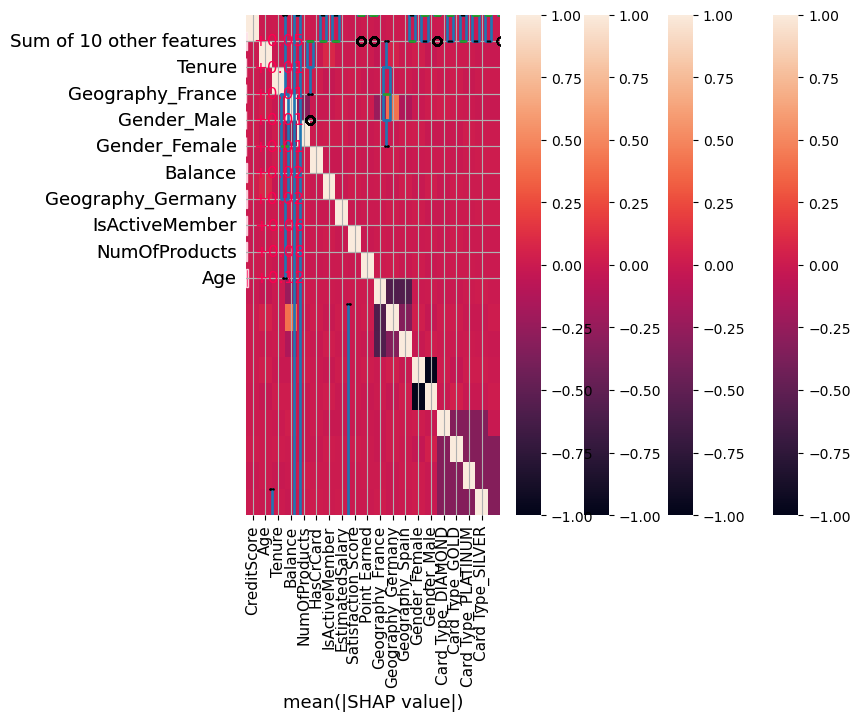

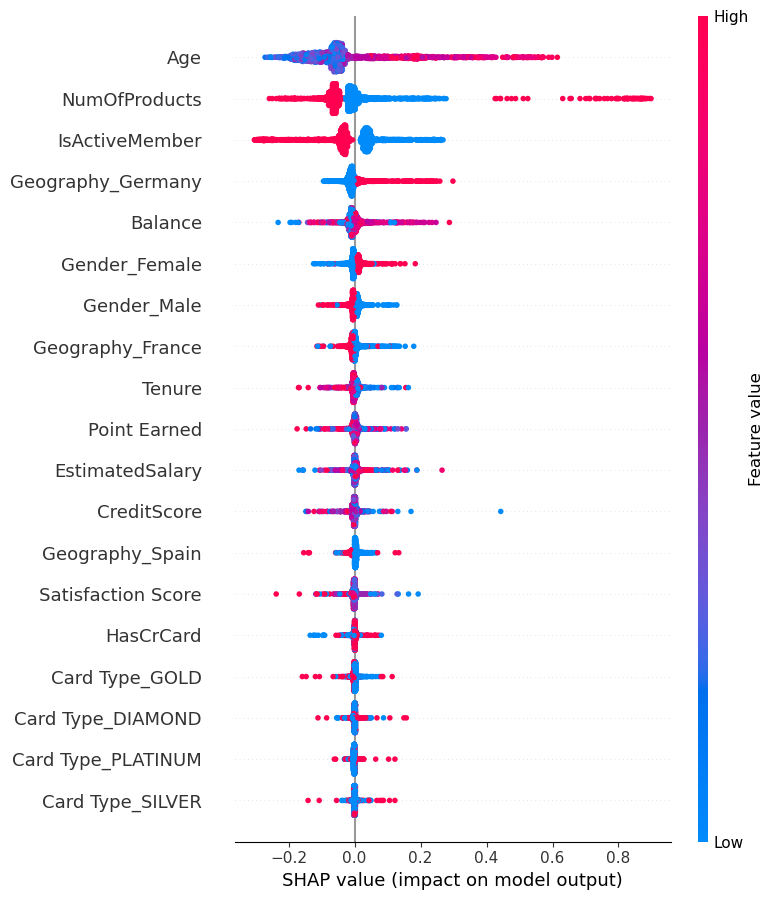

In [105]:
explainer = shap.Explainer(CV.predict, X_test)
shap_values = explainer(X_test)
shap.plots.bar(shap_values)
shap.summary_plot(shap_values)

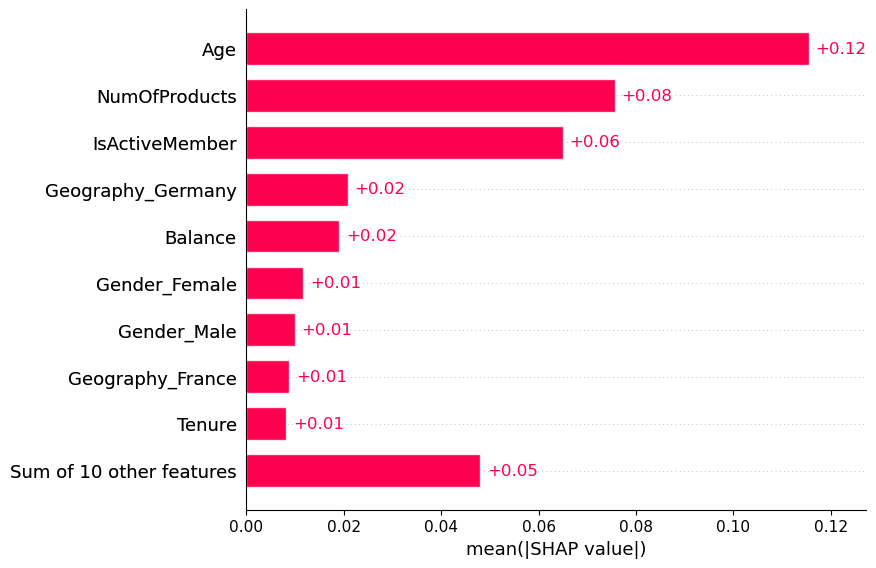

In [106]:
shap.plots.bar(shap_values)


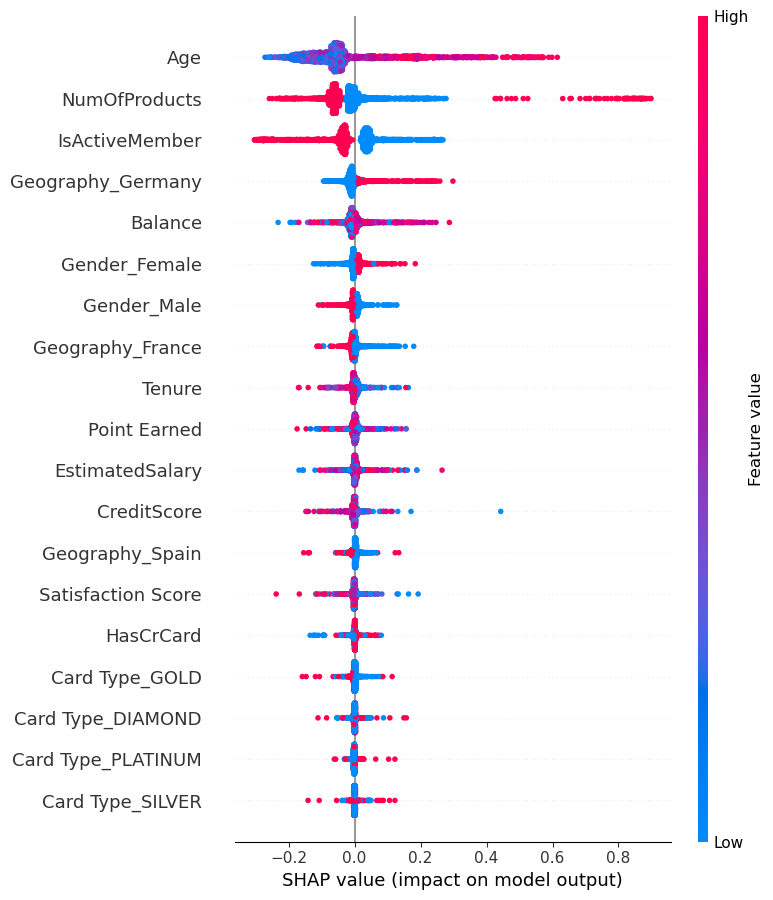

In [107]:
shap.summary_plot(shap_values)

In [109]:
df_final.to_csv('df_cleaned', index=False)